DATASETS

1. World Bank Open Data - Forest coverage (API)
2. UN Data - Population by sex and urban/rural residence between 2000 - 2020 (csv)
3. Food and Agriculture Organization of the United Nations (FAO) - FAOSTAT (csv)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

To access the World Bank Open Data API using Python, we installed the wbdata library

In [2]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


Imported the data and looked at timeframe, countries and created the dataframe

In [3]:
import wbdata
import pandas as pd
import datetime 

# Set the indicator code for forest coverage
indicator_code = 'AG.LND.FRST.ZS'

# Set the start and end year for the data
start_year = 2000
end_year = 2020

# Set the countries to retrieve data for
countries = ['USA', 'CAN', 'MEX']

# Retrieve the data
start_date = datetime.datetime(start_year, 1, 1)
end_date = datetime.datetime(end_year, 12, 31)

forest_data = wbdata.get_data(indicator_code, country=countries, data_date=(start_date, end_date))

# Convert the data to a pandas DataFrame
df = pd.DataFrame(forest_data)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator        63 non-null     object 
 1   country          63 non-null     object 
 2   countryiso3code  63 non-null     object 
 3   date             63 non-null     object 
 4   value            63 non-null     float64
 5   unit             63 non-null     object 
 6   obs_status       63 non-null     object 
 7   decimal          63 non-null     int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 4.1+ KB


In [4]:
df.head()


,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'CA', 'value': 'Canada'}",CAN,2020,38.695513,,,1
1,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'CA', 'value': 'Canada'}",CAN,2019,38.699637,,,1
2,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'CA', 'value': 'Canada'}",CAN,2018,38.703763,,,1
3,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'CA', 'value': 'Canada'}",CAN,2017,38.707888,,,1
4,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'CA', 'value': 'Canada'}",CAN,2016,38.712013,,,1


checking average forest coverage for selected countries

In [5]:

# Calculate the average forest coverage for each country
avg_forest_coverage = df.groupby('countryiso3code')['value'].mean()

# Print the average forest coverage for each country
print('Average forest coverage by country:')
print(avg_forest_coverage)


Average forest coverage by country:
countryiso3code
CAN    38.741693
MEX    34.463532
USA    33.631871
Name: value, dtype: float64


checking min and max coverage 

In [6]:

# Determine which country has the highest and lowest forest coverage
max_coverage = df.loc[df['value'].idxmax()]
min_coverage = df.loc[df['value'].idxmin()]

# Print the country with the highest and lowest forest coverage
print(f'The country with the highest forest coverage is {max_coverage["country"]} with a coverage of {max_coverage["value"]:.2f}%.')
print(f'The country with the lowest forest coverage is {min_coverage["country"]} with a coverage of {min_coverage["value"]:.2f}%.')

# Determine if any country has seen significant increases or decreases in forest coverage during the specified time period
for country in countries:
    country_data = df.loc[df['countryiso3code'] == country]
    initial_coverage = country_data.loc[country_data['date'] == str(start_year)]['value'].values[0]
    final_coverage = country_data.loc[country_data['date'] == str(end_year)]['value'].values[0]
    change = final_coverage - initial_coverage
    if abs(change) > 5:
        if change > 0:
            print(f'{country} has seen a significant increase in forest coverage of {change:.2f}% between {start_year} and {end_year}.')
        else:
            print(f'{country} has seen a significant decrease in forest coverage of {change:.2f}% between {start_year} and {end_year}.')




The country with the highest forest coverage is {'id': 'CA', 'value': 'Canada'} with a coverage of 38.79%.
The country with the lowest forest coverage is {'id': 'US', 'value': 'United States'} with a coverage of 33.13%.


In [7]:
# Retrieve the global forest coverage data for the specified time period
global_forest_data = wbdata.get_data(indicator_code,  data_date=(start_date, end_date))



In [8]:
global_forest_df = pd.DataFrame(global_forest_data)
global_forest_df.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2020,30.174186,,,1
1,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2019,30.391558,,,1
2,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2018,30.611444,,,1
3,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2017,30.824248,,,1
4,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2016,31.039613,,,1


In [9]:
# Calculate the average global forest coverage for the specified time period
global_avg_forest_coverage = df['value'].mean()
print(global_avg_forest_coverage)

# Compare the average forest coverage in the selected countries to the global average
if avg_forest_coverage.mean() > global_avg_forest_coverage:
    print('The selected countries have higher than average forest coverage compared to the global average.')
elif avg_forest_coverage.mean() < global_avg_forest_coverage:
    print('The selected countries have lower than average forest coverage compared to the global average.')
else:
    print('The selected countries have average forest coverage compared to the global average.')

35.61236560761129
The selected countries have higher than average forest coverage compared to the global average.


In [10]:
pip install pycountry pycountry_convert

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pycountry
import pycountry_convert as pc

def country_to_continent (country_alpha2):        
    continent_code = pc.country_alpha2_to_continent_code (country_alpha2)    
    continent_name = pc.convert_continent_code_to_continent_name(continent_code)
    return continent_name

# Create a lookup table mapping country codes to continents
country_code_to_continent = {}
for country in pycountry.countries:  
    try:
        continent = country_to_continent(country.alpha_2)        
        country_code_to_continent[country.alpha_3]= continent         
    except:
        pass
print(country_code_to_continent)


{'ABW': 'North America', 'AFG': 'Asia', 'AGO': 'Africa', 'AIA': 'North America', 'ALA': 'Europe', 'ALB': 'Europe', 'AND': 'Europe', 'ARE': 'Asia', 'ARG': 'South America', 'ARM': 'Asia', 'ASM': 'Oceania', 'ATG': 'North America', 'AUS': 'Oceania', 'AUT': 'Europe', 'AZE': 'Asia', 'BDI': 'Africa', 'BEL': 'Europe', 'BEN': 'Africa', 'BES': 'North America', 'BFA': 'Africa', 'BGD': 'Asia', 'BGR': 'Europe', 'BHR': 'Asia', 'BHS': 'North America', 'BIH': 'Europe', 'BLM': 'North America', 'BLR': 'Europe', 'BLZ': 'North America', 'BMU': 'North America', 'BOL': 'South America', 'BRA': 'South America', 'BRB': 'North America', 'BRN': 'Asia', 'BTN': 'Asia', 'BVT': 'Antarctica', 'BWA': 'Africa', 'CAF': 'Africa', 'CAN': 'North America', 'CCK': 'Asia', 'CHE': 'Europe', 'CHL': 'South America', 'CHN': 'Asia', 'CIV': 'Africa', 'CMR': 'Africa', 'COD': 'Africa', 'COG': 'Africa', 'COK': 'Oceania', 'COL': 'South America', 'COM': 'Africa', 'CPV': 'Africa', 'CRI': 'North America', 'CUB': 'North America', 'CUW': 'N

In [12]:
# add continent data to dataframe

global_forest_df['continent'] = global_forest_df['countryiso3code'].map(country_code_to_continent)
avg_forest_coverage_by_continent = global_forest_df.groupby('continent')['value'].mean()
print(avg_forest_coverage_by_continent)
global_forest_df.info()

continent
Africa           28.969330
Asia             22.960607
Europe           30.304611
North America    37.713132
Oceania          49.680202
South America    51.244379
Name: value, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5586 entries, 0 to 5585
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator        5586 non-null   object 
 1   country          5586 non-null   object 
 2   countryiso3code  5586 non-null   object 
 3   date             5586 non-null   object 
 4   value            5420 non-null   float64
 5   unit             5586 non-null   object 
 6   obs_status       5586 non-null   object 
 7   decimal          5586 non-null   int64  
 8   continent        4473 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 392.9+ KB


UN Data on Population by sex and urban/rural residence between 2000 - 2020

In [13]:
population = pd.read_csv("population_by_sex_residence.csv", index_col = 0)
population.head()

,Year,Area,Sex,Record Type,Reliability,Source Year,Value,Value Footnotes
Country or Area,,,,,,,,
Afghanistan,2020,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2021.0,31390171.0,1
Afghanistan,2019,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2019.0,30725560.0,1
Afghanistan,2018,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2019.0,30075018.0,1
Afghanistan,2017,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2018.0,28224323.0,1
Afghanistan,2016,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2017.0,27657145.0,1


In [14]:
population.columns
population.reset_index(inplace=True)
population.columns
population.head()

,Country or Area,Year,Area,Sex,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Afghanistan,2020,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2021.0,31390171.0,1
1,Afghanistan,2019,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2019.0,30725560.0,1
2,Afghanistan,2018,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2019.0,30075018.0,1
3,Afghanistan,2017,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2018.0,28224323.0,1
4,Afghanistan,2016,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2017.0,27657145.0,1


In [15]:
population = population.filter(items=['Country or Area','Year','Reliability','Value']).loc[(population['Reliability']=='Final figure, complete')]
population['Year'] = population['Year'].astype(int)
population = population.loc[(population['Year']>=2000) & (population['Year']<2021)]

In [16]:
def country_name_to_continent (country_name):        
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)    
        continent_name = country_to_continent(country_code)
        return continent_name
    except:        
        pass

population['continent'] = population['Country or Area'].map(country_name_to_continent)
population=population.rename(columns={'Value':'population value'})
population.head()


,Country or Area,Year,Reliability,population value,continent
21,Åland Islands,2020,"Final figure, complete",30005.5,Europe
22,Åland Islands,2019,"Final figure, complete",29836.5,Europe
23,Åland Islands,2018,"Final figure, complete",29638.0,Europe
24,Åland Islands,2017,"Final figure, complete",29352.0,Europe
25,Åland Islands,2016,"Final figure, complete",29099.0,Europe


In [36]:
population.to_csv("populationWithContinent.csv")

In [18]:
continent_population_data = population.groupby(['Year', 'continent']).sum('Value')
continent_population_data.reset_index(inplace=True)
continent_population_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              126 non-null    int64  
 1   continent         126 non-null    object 
 2   population value  126 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ KB


In [19]:
continent_population_data['population value'] = (continent_population_data['population value'] / 1000000).round(2)
print(continent_population_data.values)

[[2000 'Africa' 43.53]
 [2000 'Asia' 2592.31]
 [2000 'Europe' 1017.17]
 [2000 'North America' 758.32]
 [2000 'Oceania' 30.3]
 [2000 'South America' 226.86]
 [2001 'Africa' 64.12]
 [2001 'Asia' 1975.17]
 [2001 'Europe' 1478.27]
 [2001 'North America' 416.96]
 [2001 'Oceania' 70.4]
 [2001 'South America' 106.05]
 [2002 'Africa' 114.18]
 [2002 'Asia' 652.05]
 [2002 'Europe' 1413.66]
 [2002 'North America' 406.54]
 [2002 'Oceania' 25.47]
 [2002 'South America' 79.16]
 [2003 'Africa' 16.62]
 [2003 'Asia' 787.29]
 [2003 'Europe' 1109.22]
 [2003 'North America' 387.35]
 [2003 'Oceania' 25.52]
 [2003 'South America' 58.67]
 [2004 'Africa' 91.31]
 [2004 'Asia' 708.17]
 [2004 'Europe' 1178.74]
 [2004 'North America' 382.79]
 [2004 'Oceania' 26.05]
 [2004 'South America' 62.76]
 [2005 'Africa' 46.74]
 [2005 'Asia' 1016.32]
 [2005 'Europe' 1224.55]
 [2005 'North America' 494.28]
 [2005 'Oceania' 26.22]
 [2005 'South America' 142.23]
 [2006 'Africa' 259.36]
 [2006 'Asia' 669.58]
 [2006 'Europe' 120

In [20]:
continent_forest_data = global_forest_df.groupby(['date', 'continent']).sum('value')
continent_forest_data.reset_index(inplace=True)
continent_forest_data['Year'] = continent_forest_data['date'].astype(int)
continent_forest_data=continent_forest_data.rename(columns={'value':'forest coverage'})
continent_forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             126 non-null    object 
 1   continent        126 non-null    object 
 2   forest coverage  126 non-null    float64
 3   decimal          126 non-null    int64  
 4   Year             126 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 4.6+ KB


Third dataset on food production

In [21]:
merged_df = pd.merge(continent_population_data, continent_forest_data, left_on=['continent','Year'], right_on=['continent', 'Year'], how='inner')
print(merged_df.shape)
merged_df.head()


(126, 6)


,Year,continent,population value,date,forest coverage,decimal
0,2000,Africa,43.53,2000,1619.809204,54
1,2000,Asia,2592.31,2000,1083.110889,49
2,2000,Europe,1017.17,2000,1280.697749,46
3,2000,North America,758.32,2000,1205.603681,33
4,2000,Oceania,30.30,2000,945.163168,19


In [22]:
food = pd.read_csv("food_production.csv", index_col = 0)
food.head()

C:\Users\bogla_d7nsnlv\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
Area Code,,,,,,,,,,,,
2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1975,1975,ha,0.0,E
2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1976,1976,ha,5900.0,E
2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1977,1977,ha,6000.0,E
2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1978,1978,ha,6000.0,E
2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1979,1979,ha,6000.0,E


In [23]:
filtered_food= food.filter(items=['Area','Item','Element','Year','Unit','Value','Flag']).loc[(food['Flag']=='A') & (food['Year']>=2000) & (food['Year']<2021)]
filtered_food.head()

,Area,Item,Element,Year,Unit,Value,Flag
Area Code,,,,,,,
2,Afghanistan,"Almonds, in shell",Area harvested,2002,ha,5500.0,A
2,Afghanistan,"Almonds, in shell",Area harvested,2003,ha,5700.0,A
2,Afghanistan,"Almonds, in shell",Area harvested,2006,ha,12000.0,A
2,Afghanistan,"Almonds, in shell",Area harvested,2007,ha,12000.0,A
2,Afghanistan,"Almonds, in shell",Area harvested,2008,ha,12000.0,A


In [24]:
filtered_food['continent'] = filtered_food['Area'].map(country_name_to_continent)
filtered_food=filtered_food.rename(columns={'Value':'food value'})
filtered_food.head()

,Area,Item,Element,Year,Unit,food value,Flag,continent
Area Code,,,,,,,,
2,Afghanistan,"Almonds, in shell",Area harvested,2002,ha,5500.0,A,Asia
2,Afghanistan,"Almonds, in shell",Area harvested,2003,ha,5700.0,A,Asia
2,Afghanistan,"Almonds, in shell",Area harvested,2006,ha,12000.0,A,Asia
2,Afghanistan,"Almonds, in shell",Area harvested,2007,ha,12000.0,A,Asia
2,Afghanistan,"Almonds, in shell",Area harvested,2008,ha,12000.0,A,Asia


In [25]:
continent_filtered_food = filtered_food.groupby(['Year', 'continent']).sum('value')
continent_filtered_food .reset_index(inplace=True)
continent_filtered_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        126 non-null    int64  
 1   continent   126 non-null    object 
 2   food value  126 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ KB


Creating the final, merged DataFrame

In [26]:
continent_df = pd.merge(merged_df, continent_filtered_food, left_on=['continent','Year'], right_on=['continent', 'Year'], how='inner')
print(continent_df.shape)
continent_df.head()

(126, 7)


,Year,continent,population value,date,forest coverage,decimal,food value
0,2000,Africa,43.53,2000,1619.809204,54,2.289529e+09
1,2000,Asia,2592.31,2000,1083.110889,49,8.437340e+09
2,2000,Europe,1017.17,2000,1280.697749,46,5.511825e+09
3,2000,North America,758.32,2000,1205.603681,33,3.514083e+09
4,2000,Oceania,30.30,2000,945.163168,19,9.662191e+08


In [27]:
continent_df= continent_df.filter(items=['Year','continent','population value','forest coverage','food value'])
continent_df.head()


,Year,continent,population value,forest coverage,food value
0,2000,Africa,43.53,1619.809204,2.289529e+09
1,2000,Asia,2592.31,1083.110889,8.437340e+09
2,2000,Europe,1017.17,1280.697749,5.511825e+09
3,2000,North America,758.32,1205.603681,3.514083e+09
4,2000,Oceania,30.30,945.163168,9.662191e+08


In [28]:
continent_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              126 non-null    int64  
 1   continent         126 non-null    object 
 2   population value  126 non-null    float64
 3   forest coverage   126 non-null    float64
 4   food value        126 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.9+ KB


In [29]:
continent_df_unique = continent_df["Year"].unique()
print(continent_df_unique)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]


In [30]:
continent_df_unique2 = continent_df["continent"].unique()
print(continent_df_unique2)

['Africa' 'Asia' 'Europe' 'North America' 'Oceania' 'South America']


Text(0.5, 1.0, 'Population')

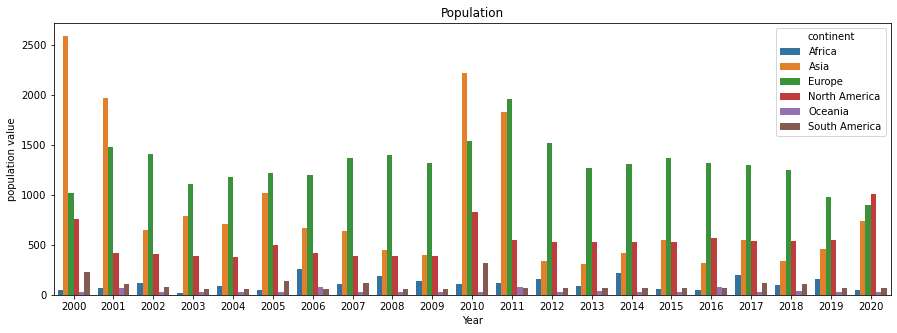

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=continent_df, y='population value', x='Year', hue='continent')
plt.title('Population')

Text(0.5, 1.0, 'Forest coverage')

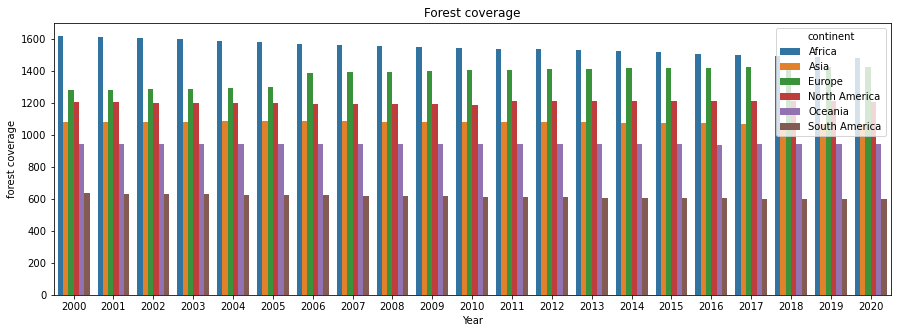

In [32]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=continent_df, y='forest coverage', x='Year', hue='continent')
plt.title('Forest coverage')

Text(0.5, 1.0, 'Food production')

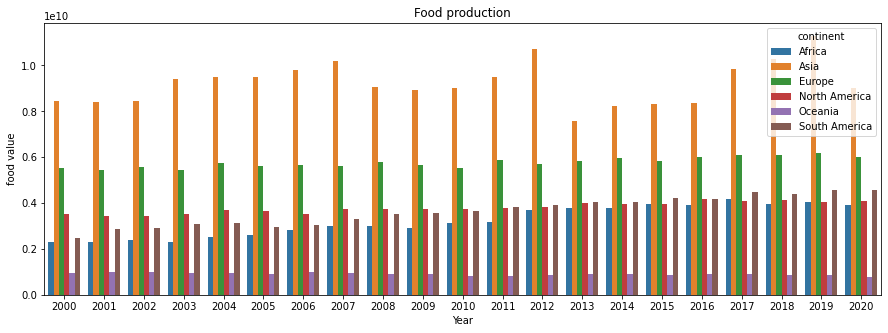

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=continent_df, y='food value', x='Year', hue='continent')
plt.title('Food production')

In [34]:
filtered_global_forest_df = global_forest_df[global_forest_df['countryiso3code'].isin(['CAN', 'BRA', 'RUS', 'CHN'])]
filtered_global_forest_df.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal,continent
1575,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'BR', 'value': 'Brazil'}",BRA,2020,59.417478,,,1,South America
1576,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'BR', 'value': 'Brazil'}",BRA,2019,59.558526,,,1,South America
1577,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'BR', 'value': 'Brazil'}",BRA,2018,59.708428,,,1,South America
1578,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'BR', 'value': 'Brazil'}",BRA,2017,59.832881,,,1,South America
1579,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'BR', 'value': 'Brazil'}",BRA,2016,60.071033,,,1,South America


Text(0.5, 1.0, 'Forest coverage')

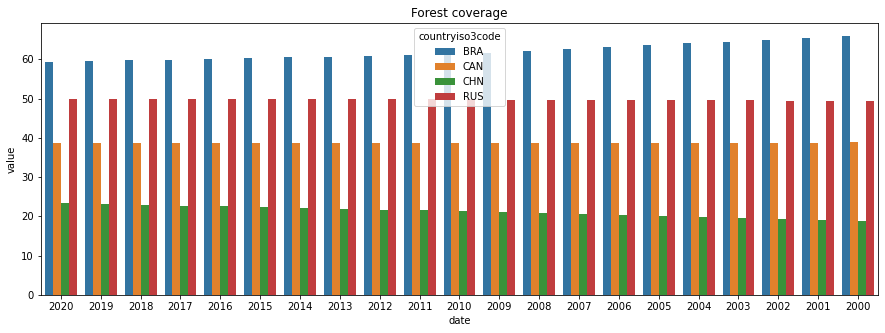

In [35]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=filtered_global_forest_df, y='value', x='date', hue='countryiso3code')
plt.title('Forest coverage')